
<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=10>
    Deep Learning - HW4 <br>
<font color=2565AE size=5>
    Electrical Engineering Department <br>
    winter 2024<br>
<font color=3C99D size=5>
    Practical Assignment 3 <br>
<font color=696880 size=4>
    Amirabbas Afzali

____

# Personal Data

In [ ]:
# Set your student number
student_number = '400101078'
Name = 'Tina'
Last_Name = 'Halimi'

# Rules
- Make sure that all of your cells can be run perfectly.
- Try to minimize your use of ChatGPT (or any other AI assistant) as much as possible.
- You must create a report for this task in PDF format and explain the main results.

---

## **Introduction**

Large Language Models (LLMs) are a class of deep learning models designed for processing and generating natural language. These models are trained using large amounts of textual data and utilize architectures based on transformers. Some of the applications of these models include text generation, machine translation, text summarization, question answering, and text classification.

### *Encoder-Decoder LLMs*

One of the common architectures in large language models is the Encoder-Decoder architecture. In this architecture, the encoder processes an input sequence and maps it to a latent space. Then, the decoder uses this latent space to generate an output sequence. Models like T5 [1] (Text-to-Text Transfer Transformer) use this architecture to perform various tasks. In T5, all tasks are expressed in a "text-to-text" format, meaning both input and output are text. This model has capabilities such as translation, summarization, and text classification. One of the advantages of the Encoder-Decoder architecture is that it allows the encoder to utilize information from both before and after a word to gain a more comprehensive understanding of the text.

### *Decoder-only LLMs*

Decoder-only models, such as GPT-2, GPT-3, and LLaMA [2], unlike the Encoder-Decoder architecture, only use the decoder part. These models use an autoregressive mode, meaning they predict the next token based on previous tokens. These models are highly efficient for text generation and have found widespread applications today.

Advantages of Decoder-only Models

- Efficiency: Decoder-only models are more efficient than Encoder-Decoder models due to the absence of an independent encoder. This makes them require fewer computational and memory resources.
- Simplicity: Due to their autoregressive nature, these models can easily generate sequences in order.
- Scalability: Due to their simpler architecture, these models can be scaled to much larger sizes.


However, one of the drawbacks of these models is that they can only utilize information from tokens before the current token and cannot use tokens that come after for prediction. This limitation is significant in tasks like classification or translation, where a full understanding of the sequence is needed.



## **Objective of the Exercise**


In this exercise, the goal is to convert a generative Decoder-only language model into an encoder and evaluate its performance on a binary sentiment classification task. The main aim is to modify the Decoder-only model so that it can function as an encoder and better handle tasks requiring bidirectional understanding.

## **In this exercise, you should:**


### In this exercise, you should:

1. **Import a Decoder-only model** and load the weights of a pre-trained version of the model.
2. **Generate several outputs from the model**, and include at most 10 sample outputs in your report for different inputs.  
   You should also briefly explain the effects of key configurations in text generation, including:  
   - `Temperature`
   - `top_k`
   - `top_p`
   - `repetition_penalty`
   - `num_beams`
   - `no_repeat_ngram_size`
3. **Load the SST-2 dataset**, which is part of the GLUE benchmark for sentiment classification.  
   - Note that the model’s output depends on the number of input tokens.
   - Apply necessary padding to the dataset after loading it to allow for parallel execution of the model.
4. **Remove the model’s final layer**, which outputs to the size of the model’s dictionary.  
   - Use the embedding vector of the first token (CLS token) for classification.
5. As observed in the previous step, sometimes the embedding vector of the first token does not provide a good representation of the entire input text.  
   - **Add a linear layer** with the same input and output dimensions on top of the encoder's output, and use the output of this linear layer (corresponding to the CLS token) for classification.  
   - This step aggregates information of different tokens to get a comprehensive understanding of the input text.
6. **Instead of the linear layer** in the previous section, use a **bidirectional attention layer** with a custom number of heads (preferably 12).
7. **Repeat step 6** using **left-to-right unidirectional attention** and **right-to-left unidirectional attention**.
8. **Load a pre-trained decoder** (preferably BERT-base) and report its **zero-shot performance** (i.e., without needing to train the model) on the test data.

## **Evaluation:**

In this exercise, for each of sections 4, 5, 6, 7, and 8, you need to plot the confusion matrix corresponding to the model's performance on the test data. Additionally, you should plot two separate graphs showing the training loss and the accuracy of the trained models, and compare them with each other, providing an appropriate analysis of your results. Also, note that high accuracy is not expected for sections 4 and 5, but the correctness of your code will be checked. However, for sections 6 and 7, higher accuracy (around 90%) is expected.













## **Let's go:**


Load `gpt2` model:

## **1**

In [ ]:
import torch
if not torch.cuda.is_available():
    raise RuntimeError("CUDA is not available. Please check your setup.")

In [ ]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel, GPT2Model
import torch
from torch import nn

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2").to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


## **2**

In [ ]:
input_prompts = [
    "Once upon a time,",
    "In the future,",
    "Artificial intelligence is",
    "The purpose of life is",
    "The weather today is",
    "In a small village,",
    "Technology has changed",
    "The experiment began with",
    "He opened the mysterious box and found",
    "During the final moments of the match,"
]

outputs = []
for prompt in input_prompts:
    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")  # Tokenize and move to GPU
    output = model.generate(
        **inputs,
        max_length=50,  # Maximum length of the generated sequence
        temperature=0.7,  # Sampling temperature for randomness
        top_k=50,        # Top-k sampling
        top_p=0.9,       # Nucleus sampling
        num_beams=1,     # Number of beams for beam search
        repetition_penalty=1.2,  # Penalize repeated tokens
        no_repeat_ngram_size=2  # Prevent repeating n-grams
    )
    decoded_output = tokenizer.decode(output[0], skip_special_tokens=True)
    outputs.append(decoded_output)

print("\nGenerated Outputs:")
for i, output in enumerate(outputs):
    print(f"Prompt {i + 1}: {input_prompts[i]}")
    print(f"Generated Output: {output}\n")

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:633: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token


Generated Outputs:
Prompt 1: Once upon a time,
Generated Output: Once upon a time, the world was filled with people who were not only rich but also powerful.
The first thing that came to mind when I thought of this is how much money they had in their pockets and what kind it would be if someone

Prompt 2: In the future,
Generated Output: In the future, we will be able to use our own data and algorithms for this.
The first step is that you can create a new dataset with your existing datasets (or any other type of database) in order not to have them change over

Prompt 3: Artificial intelligence is
Generated Output: Artificial intelligence is a new field of research that has been in the works for some time. It's not just about how we learn, it's also what makes us human."
 (Photo: Getty Images)
"We're going to have

Prompt 4: The purpose of life is
Generated Output: The purpose of life is to be free from the shackles and restraints imposed by society. The only way out of this predicamen

## 1. **Temperature**
- **Definition**: A scaling factor that is applied to the logits (predictions for the next token) before sampling.
- **Effect**:
  - When `temperature` is **1.0**, the logits are unadjusted—this is the baseline sampling distribution.
  - If `temperature` is **> 1.0**, the next-token probabilities become more “spread out,” making the model **more random and creative**.  
  - If `temperature` is **< 1.0**, the distribution becomes “sharper” and the model picks more probable tokens more confidently, producing **more deterministic and less varied** text.
- **Intuition**: The higher the temperature, the more risk-taking the model is in choosing the next token.  

---

## 2. **top_k**
- **Definition**: A parameter that limits the sampling to the top *k* most probable next tokens at each step.
- **Effect**:
  - If `top_k` = 50, for instance, the model only considers the 50 most likely tokens for sampling the next word.
  - Larger `top_k` allows the model to consider a broader set of possible next tokens, yielding **more diverse** outputs.
  - Smaller `top_k` forces the model to pick from only a few top candidates, which can sometimes make text **more focused** but also less creative.
- **Intuition**: This ensures that very low-probability (often nonsensical) tokens are excluded from sampling, helping to keep the generation on track.

---

## 3. **top_p** (a.k.a. Nucleus Sampling)
- **Definition**: A parameter that restricts sampling to the smallest possible set of tokens whose cumulative probability mass exceeds *p*.
- **Effect**:
  - For example, if `top_p` = 0.9, the model dynamically chooses the top set of tokens whose probabilities sum to 90%.  
  - This can achieve a flexible balance between diversity and coherence, often working better than a static `top_k` threshold.
- **Intuition**: Instead of a fixed cutoff on the number of tokens, `top_p` ensures that the model only considers tokens within the top slice of the probability distribution, preventing extremely unlikely tokens from being sampled.

---

## 4. **repetition_penalty**
- **Definition**: A factor that penalizes the model for generating the same token multiple times.
- **Effect**:
  - If `repetition_penalty` is **> 1.0**, the model will reduce the probability of tokens that have already been generated, helping avoid repetitive loops.
  - If it’s **< 1.0** (which is rare in practice), it would incentivize repetition (usually undesirable).
- **Intuition**: A higher repetition penalty discourages repeated phrases or words, promoting more **varied** wording and preventing the model from getting “stuck.”

---

## 5. **num_beams** (for Beam Search)
- **Definition**: The number of beams used in beam search, a search algorithm used to find the highest-probability sequence of tokens.
- **Effect**:
  - If `num_beams` = 1, you are effectively doing random sampling (if you’re also using sampling parameters like temperature), or greedy decoding if `temperature` = 0, etc.
  - Larger `num_beams` generally produces more “coherent” text, especially for tasks where correctness is key (e.g., summarization). However, higher beams can also reduce output diversity, making the text **bland**.
- **Intuition**: Think of beams as parallel guesses for the best next token sequence; the model expands multiple candidate sequences at once, then picks the highest scoring sequence.  

---

## 6. **no_repeat_ngram_size**
- **Definition**: A constraint that disallows the model from repeating any *n*-gram of a specified size.
- **Effect**:
  - If `no_repeat_ngram_size` = 2, the model is barred from generating any **two-token** sequence that has already appeared in the text.
  - This parameter helps tackle repetition at a **phrase** level rather than just penalizing a single token.
- **Intuition**: It’s a straightforward mechanism to ensure the model does not produce short repeated phrases like “the cat the cat,” by preventing entire n-gram sequences from reappearing.

---

### Putting It All Together
- **Temperature**, `top_k`, and `top_p` control how “exploratory” or “constrained” the sampling from the next-token distribution is.
- **repetition_penalty** and `no_repeat_ngram_size` specifically target the **repetition problem**, each from a different angle.
- **num_beams** pertains to *beam search*, which focuses on finding higher-probability sequences rather than purely random sampling.

By tuning these parameters, you can shift your model’s generation style from **creative** and sometimes chaotic to **coherent** but potentially repetitive or predictable. Finding the right combination often depends on the task and user preference.

## **3**

Load `sst-2` dataset:

In [ ]:
!pip install datasets

In [ ]:
from transformers import GPT2Tokenizer
from datasets import load_dataset
from torch.utils.data import DataLoader
from transformers import DataCollatorWithPadding

dataset = load_dataset("glue", "sst2")

In [ ]:
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token

def tokenize_function(example):
    return tokenizer(
        example["sentence"],
        truncation=True,
        max_length=128,
        padding="max_length"
    )

# Apply the tokenization function and remove unnecessary columns
tokenized_datasets = dataset.map(tokenize_function, batched=True, remove_columns=["sentence", "idx"])

# Data collator for dynamic padding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

train_data = tokenized_datasets["train"]
val_data = tokenized_datasets["validation"]

train_dataloader = DataLoader(
    train_data, batch_size=16, shuffle=True, collate_fn=data_collator
)
validation_dataloader = DataLoader(
    val_data, batch_size=16, collate_fn=data_collator
)

batch = next(iter(train_dataloader))
print("Batch Keys:", batch.keys())
print("Input IDs Shape:", batch["input_ids"].shape)
print("Attention Mask Shape:", batch["attention_mask"].shape)
print("Labels Shape:", batch["labels"].shape)

Batch Keys: dict_keys(['input_ids', 'attention_mask', 'labels'])
Input IDs Shape: torch.Size([16, 128])
Attention Mask Shape: torch.Size([16, 128])
Labels Shape: torch.Size([16])


In [ ]:
from datasets import load_dataset

dataset = load_dataset("glue", "sst2")

In [ ]:
from torch.utils.data import DataLoader

tokenizer.pad_token = tokenizer.eos_token

def tokenize_function(examples):
    return tokenizer(
        examples["sentence"],
        truncation=True,
        padding="max_length",
        max_length=128
    )

train_data = dataset["train"].map(tokenize_function, batched=True)
val_data = dataset["validation"].map(tokenize_function, batched=True)
test_data = dataset["test"].map(tokenize_function, batched=True)


def convert_to_torch_format(dataset):
    dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
    return dataset

train_data = convert_to_torch_format(train_data)
val_data = convert_to_torch_format(val_data)
test_data = convert_to_torch_format(test_data)

train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
validation_loader = DataLoader(val_data, batch_size=16)
test_loader = DataLoader(test_data, batch_size=16)

batch = next(iter(train_loader))
print("Batch Keys:", batch.keys())
print("Input IDs Shape:", batch["input_ids"].shape)
print("Attention Mask Shape:", batch["attention_mask"].shape)
print("Labels Shape:", batch["label"].shape)

Batch Keys: dict_keys(['label', 'input_ids', 'attention_mask'])
Input IDs Shape: torch.Size([16, 128])
Attention Mask Shape: torch.Size([16, 128])
Labels Shape: torch.Size([16])


## **4**

In [ ]:
print("Original Model")
print(model)

Original Model
GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)


In [ ]:
import torch
from torch import nn
from transformers import GPT2Tokenizer, GPT2Model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token
gpt2_base = GPT2Model.from_pretrained("gpt2").to("cuda")

class GPT2Classifier(nn.Module):
    def __init__(self, base_model, hidden_dim, num_classes):
        super(GPT2Classifier, self).__init__()
        self.base_model = base_model
        self.output_layer = nn.Linear(hidden_dim, num_classes)

        for param in self.base_model.parameters():
            param.requires_grad = False

    def forward(self, input_ids, attention_mask):
        model_output = self.base_model(input_ids=input_ids, attention_mask=attention_mask)
        cls_token_representation = model_output.last_hidden_state[:, 0, :]  # Use the first token embedding
        logits = self.output_layer(cls_token_representation)
        return logits

In [ ]:
classification_model = GPT2Classifier(gpt2_base, hidden_dim=768, num_classes=2).to("cuda")

In [ ]:
print("Model Without Last Layer")
print(classification_model)

Model Without Last Layer
GPT2Classifier(
  (base_model): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (output_layer): Linear(in_features=768, out_features=2, bias=True)
)


In [ ]:
optimizer = torch.optim.AdamW(classification_model.parameters(), lr=5e-5)
loss_function = nn.CrossEntropyLoss()

In [ ]:
def train_model(classification_model, train_loader, val_loader, optimizer, epochs=3):
    epoch_loss_history = []
    epoch_accuracy_history = []

    for epoch in range(epochs):
        classification_model.train()
        cumulative_loss, correct_preds, total_samples = 0, 0, 0

        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch + 1}/{epochs}")

        for batch_data in progress_bar:
            input_tensors = {key: val.to("cuda") for key, val in batch_data.items() if key in ["input_ids", "attention_mask"]}
            target_labels = batch_data["labels"].to("cuda")

            # Forward pass
            predictions = classification_model(**input_tensors)
            batch_loss = loss_function(predictions, target_labels)

            # Backward pass
            optimizer.zero_grad()
            batch_loss.backward()
            optimizer.step()

            # Update metrics
            cumulative_loss += batch_loss.item()
            predicted_labels = torch.argmax(predictions, dim=-1)
            correct_preds += (predicted_labels == target_labels).sum().item()
            total_samples += target_labels.size(0)

            progress_bar.set_postfix(loss=batch_loss.item())

        avg_loss = cumulative_loss / len(train_loader)
        epoch_accuracy = correct_preds / total_samples
        epoch_loss_history.append(avg_loss)
        epoch_accuracy_history.append(epoch_accuracy)
        print(f"Epoch {epoch + 1}: Loss = {avg_loss:.4f}, Accuracy = {epoch_accuracy:.4f}")

    return epoch_loss_history, epoch_accuracy_history

In [ ]:
train_loss_history, train_accuracy_history = train_model(
    classification_model, train_dataloader, validation_dataloader, optimizer, epochs=3
)

Epoch 1/3: 100%|██████████| 4210/4210 [09:26<00:00,  7.43it/s, loss=0.807]


Epoch 1: Loss = 0.6915, Accuracy = 0.5554


Epoch 2/3: 100%|██████████| 4210/4210 [09:16<00:00,  7.56it/s, loss=0.626]


Epoch 2: Loss = 0.6759, Accuracy = 0.5703


Epoch 3/3: 100%|██████████| 4210/4210 [09:16<00:00,  7.56it/s, loss=0.609]

Epoch 3: Loss = 0.6720, Accuracy = 0.5765


In [ ]:
def evaluate_model(classification_model, test_loader):
    classification_model.eval()
    test_predicted_labels, test_true_labels = [], []
    correct_predictions, total_samples = 0, 0

    with torch.no_grad():
        for batch_data in tqdm(test_loader, desc="Evaluating"):
            input_tensors = {key: val.to("cuda") for key, val in batch_data.items() if key in ["input_ids", "attention_mask"]}
            target_labels = batch_data["labels"].to("cuda")
            logits = classification_model(**input_tensors)

            predicted_labels = torch.argmax(logits, dim=-1)
            test_predicted_labels.extend(predicted_labels.cpu().numpy())
            test_true_labels.extend(target_labels.cpu().numpy())

            correct_predictions += (predicted_labels == target_labels).sum().item()
            total_samples += target_labels.size(0)

    test_accuracy = correct_predictions / total_samples
    return test_predicted_labels, test_true_labels, test_accuracy


In [ ]:
# Evaluate the model on the validation dataset (because there is a missmatch between test data and train data)
val_predicted_labels, val_true_labels, test_accuracy = evaluate_model(classification_model, validation_dataloader)
print(f"Test Accuracy: {test_accuracy:.4f}")

Evaluating: 100%|██████████| 55/55 [00:06<00:00,  7.88it/s]

Test Accuracy: 0.5447


In [ ]:
def plot_training_metrics(train_losses, train_accuracies, num_epochs=3):

    # Plot training loss
    plt.figure()
    plt.plot(range(1, num_epochs + 1), train_losses, marker='o', label="Train Loss")
    plt.title("Training Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    # Plot training accuracy
    plt.figure()
    plt.plot(range(1, num_epochs + 1), train_accuracies, marker='o', label="Train Accuracy")
    plt.title("Training Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

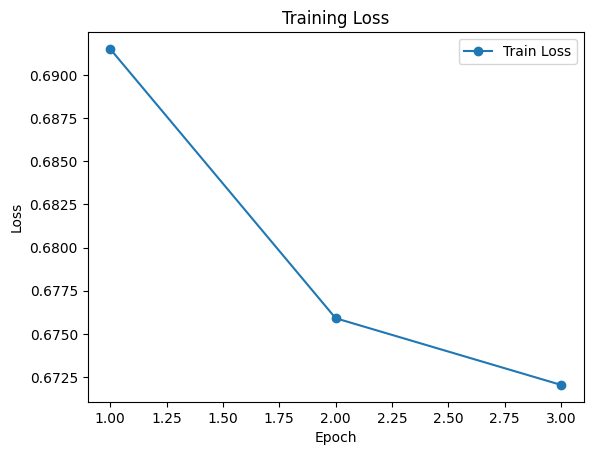

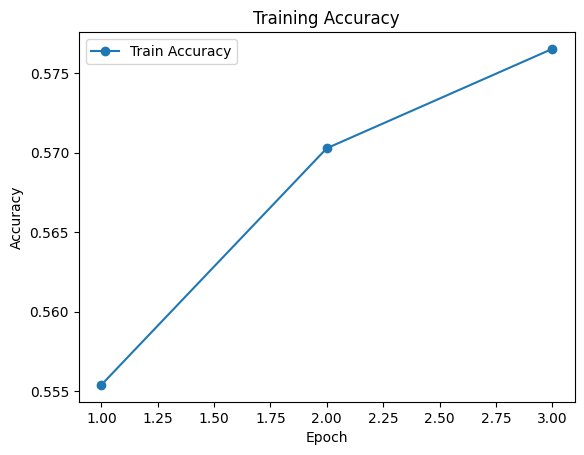

In [ ]:
plot_training_metrics(train_loss_history, train_accuracy_history, num_epochs=3)

<Figure size 640x480 with 0 Axes>

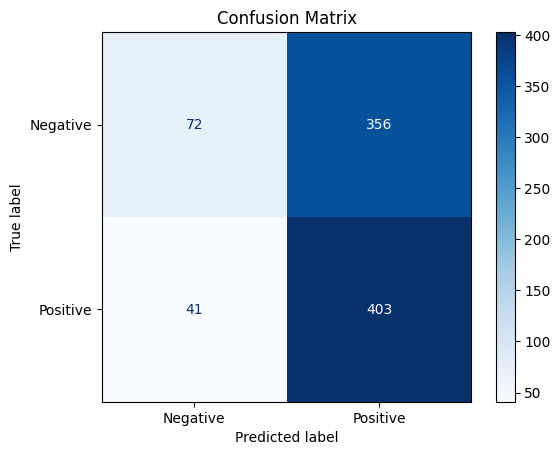

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(true_labels, predicted_labels, class_names):
    cm = confusion_matrix(true_labels, predicted_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

    plt.figure()
    disp.plot(cmap="Blues", values_format="d")
    plt.title("Confusion Matrix")
    plt.show()

class_names = ["Negative", "Positive"]
plot_confusion_matrix(val_true_labels, val_predicted_labels, class_names)


## **5**

In [ ]:
from transformers import GPT2Tokenizer, GPT2Model
import torch
from torch import nn

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token
base_model = GPT2Model.from_pretrained("gpt2").to("cuda")

class GPT2ClassifierWithAggregation(nn.Module):
    def __init__(self, base_model, num_classes):
        super(GPT2ClassifierWithAggregation, self).__init__()
        self.base_model = base_model
        self.aggregation_layer = nn.Linear(base_model.config.hidden_size, base_model.config.hidden_size)
        self.classifier = nn.Linear(base_model.config.hidden_size, num_classes)

        for param in self.base_model.parameters():
            param.requires_grad = False

    def forward(self, input_ids, attention_mask):

        outputs = self.base_model(input_ids=input_ids, attention_mask=attention_mask)

        token_embeddings = outputs.last_hidden_state
        aggregated_output = self.aggregation_layer(token_embeddings)

        cls_embedding = aggregated_output[:, 0, :]

        logits = self.classifier(cls_embedding)
        return logits


In [ ]:
num_classes = 2
agg_model = GPT2ClassifierWithAggregation(base_model, num_classes).to("cuda")
optimizer = torch.optim.AdamW(agg_model.parameters(), lr=5e-5)
loss_function = nn.CrossEntropyLoss()

def train_model(classification_model, train_loader, val_loader, optimizer, epochs=3):
    epoch_loss_history = []
    epoch_accuracy_history = []

    for epoch in range(epochs):
        classification_model.train()
        cumulative_loss, correct_preds, total_samples = 0, 0, 0

        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch + 1}/{epochs}")

        for batch_data in progress_bar:
            input_tensors = {key: val.to("cuda") for key, val in batch_data.items() if key in ["input_ids", "attention_mask"]}
            target_labels = batch_data["labels"].to("cuda")

            predictions = classification_model(**input_tensors)
            batch_loss = loss_function(predictions, target_labels)

            optimizer.zero_grad()
            batch_loss.backward()
            optimizer.step()

            cumulative_loss += batch_loss.item()
            predicted_labels = torch.argmax(predictions, dim=-1)
            correct_preds += (predicted_labels == target_labels).sum().item()
            total_samples += target_labels.size(0)

            progress_bar.set_postfix(loss=batch_loss.item())

        avg_loss = cumulative_loss / len(train_loader)
        epoch_accuracy = correct_preds / total_samples
        epoch_loss_history.append(avg_loss)
        epoch_accuracy_history.append(epoch_accuracy)
        print(f"Epoch {epoch + 1}: Loss = {avg_loss:.4f}, Accuracy = {epoch_accuracy:.4f}")

    return epoch_loss_history, epoch_accuracy_history

def evaluate_model(classification_model, test_loader):
    classification_model.eval()
    test_predicted_labels, test_true_labels = [], []
    correct_predictions, total_samples = 0, 0

    with torch.no_grad():
        for batch_data in tqdm(test_loader, desc="Evaluating"):
            input_tensors = {key: val.to("cuda") for key, val in batch_data.items() if key in ["input_ids", "attention_mask"]}
            target_labels = batch_data["labels"].to("cuda")
            logits = classification_model(**input_tensors)

            predicted_labels = torch.argmax(logits, dim=-1)
            test_predicted_labels.extend(predicted_labels.cpu().numpy())
            test_true_labels.extend(target_labels.cpu().numpy())

            correct_predictions += (predicted_labels == target_labels).sum().item()
            total_samples += target_labels.size(0)

    test_accuracy = correct_predictions / total_samples
    return test_predicted_labels, test_true_labels, test_accuracy



In [ ]:
train_loss_history, train_accuracy_history = train_model(
    agg_model, train_dataloader, validation_dataloader, optimizer, epochs=3
)


Epoch 1/3: 100%|██████████| 4210/4210 [09:24<00:00,  7.46it/s, loss=0.81]


Epoch 1: Loss = 0.6864, Accuracy = 0.5636


Epoch 2/3: 100%|██████████| 4210/4210 [09:23<00:00,  7.47it/s, loss=0.7]


Epoch 2: Loss = 0.6812, Accuracy = 0.5716


Epoch 3/3: 100%|██████████| 4210/4210 [09:23<00:00,  7.47it/s, loss=0.521]

Epoch 3: Loss = 0.6781, Accuracy = 0.5766


In [ ]:
val_predicted_labels, val_true_labels, test_accuracy = evaluate_model(agg_model, validation_dataloader)
print(f"Test Accuracy: {test_accuracy:.4f}")

Evaluating: 100%|██████████| 55/55 [00:06<00:00,  8.01it/s]

Test Accuracy: 0.5195


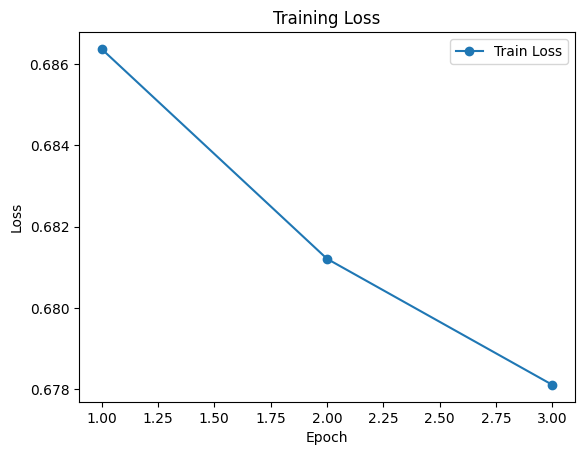

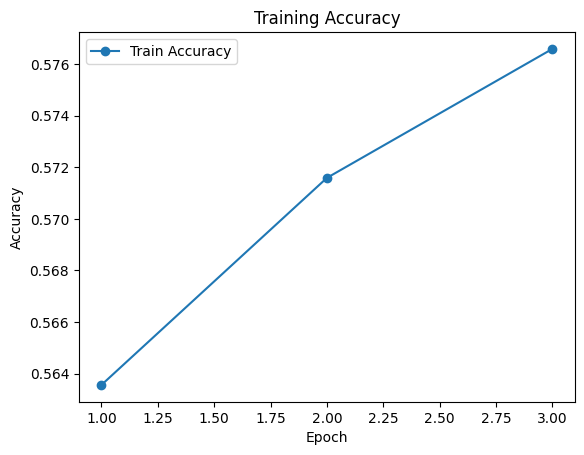

<Figure size 640x480 with 0 Axes>

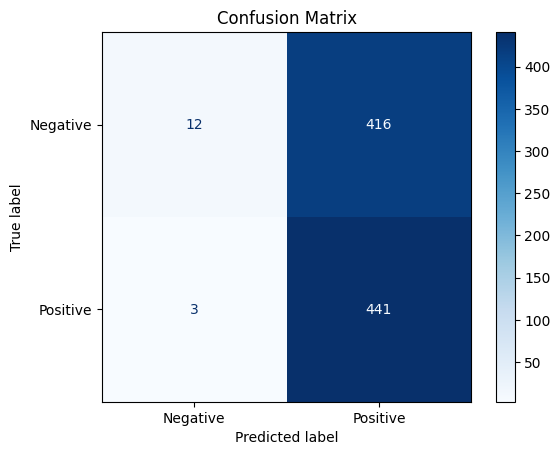

In [ ]:
plot_training_metrics(train_loss_history, train_accuracy_history, num_epochs=3)
class_names = ["Negative", "Positive"]
plot_confusion_matrix(val_true_labels, val_predicted_labels, class_names)

## **6**

In [ ]:
import torch.nn.functional as F

from transformers import GPT2Model, GPT2Tokenizer
from torch import nn
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np


class GPT2ClassifierWithAttention(nn.Module):
    def __init__(self, base_model, hidden_size, num_attention_heads, num_classes):
        super(GPT2ClassifierWithAttention, self).__init__()
        self.base_model = base_model
        self.attention_layer = nn.MultiheadAttention(
            embed_dim=hidden_size, num_heads=num_attention_heads, batch_first=True
        )
        self.classification_layer = nn.Linear(hidden_size, num_classes)

        for param in self.base_model.parameters():
            param.requires_grad = False

    def forward(self, input_ids, attention_mask):
        outputs = self.base_model(input_ids=input_ids, attention_mask=attention_mask)
        hidden_states = outputs.last_hidden_state

        attention_output, _ = self.attention_layer(hidden_states, hidden_states, hidden_states)

        cls_embedding = attention_output[:, 0, :]

        logits = self.classification_layer(cls_embedding)
        return logits


In [ ]:
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token
base_model = GPT2Model.from_pretrained("gpt2").to("cuda")

hidden_size = 768
num_heads = 12
num_classes = 2
att_model = GPT2ClassifierWithAttention(base_model, hidden_size, num_heads, num_classes).to("cuda")
print(att_model)

GPT2ClassifierWithAttention(
  (base_model): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (attention_layer): MultiheadAttention(
    (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out

In [ ]:
optimizer = torch.optim.AdamW(att_model.parameters(), lr=5e-5)
loss_function = nn.CrossEntropyLoss()

def train_model(classification_model, train_loader, val_loader, optimizer, epochs=3):
    epoch_loss_history = []
    epoch_accuracy_history = []

    for epoch in range(epochs):
        classification_model.train()
        cumulative_loss, correct_preds, total_samples = 0, 0, 0

        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch + 1}/{epochs}")

        for batch_data in progress_bar:
            input_tensors = {key: val.to("cuda") for key, val in batch_data.items() if key in ["input_ids", "attention_mask"]}
            target_labels = batch_data["labels"].to("cuda")

            predictions = classification_model(**input_tensors)
            batch_loss = loss_function(predictions, target_labels)

            optimizer.zero_grad()
            batch_loss.backward()
            optimizer.step()

            cumulative_loss += batch_loss.item()
            predicted_labels = torch.argmax(predictions, dim=-1)
            correct_preds += (predicted_labels == target_labels).sum().item()
            total_samples += target_labels.size(0)

            progress_bar.set_postfix(loss=batch_loss.item())

        avg_loss = cumulative_loss / len(train_loader)
        epoch_accuracy = correct_preds / total_samples
        epoch_loss_history.append(avg_loss)
        epoch_accuracy_history.append(epoch_accuracy)
        print(f"Epoch {epoch + 1}: Loss = {avg_loss:.4f}, Accuracy = {epoch_accuracy:.4f}")

    return epoch_loss_history, epoch_accuracy_history

def evaluate_model(classification_model, test_loader):
    classification_model.eval()
    test_predicted_labels, test_true_labels = [], []
    correct_predictions, total_samples = 0, 0

    with torch.no_grad():
        for batch_data in tqdm(test_loader, desc="Evaluating"):
            input_tensors = {key: val.to("cuda") for key, val in batch_data.items() if key in ["input_ids", "attention_mask"]}
            target_labels = batch_data["labels"].to("cuda")
            logits = classification_model(**input_tensors)

            predicted_labels = torch.argmax(logits, dim=-1)
            test_predicted_labels.extend(predicted_labels.cpu().numpy())
            test_true_labels.extend(target_labels.cpu().numpy())

            correct_predictions += (predicted_labels == target_labels).sum().item()
            total_samples += target_labels.size(0)

    test_accuracy = correct_predictions / total_samples
    return test_predicted_labels, test_true_labels, test_accuracy

In [ ]:
train_loss_history, train_accuracy_history = train_model(
    att_model, train_dataloader, validation_dataloader, optimizer, epochs=3
)

Epoch 1/3: 100%|██████████| 4210/4210 [10:03<00:00,  6.98it/s, loss=0.399]


Epoch 1: Loss = 0.5172, Accuracy = 0.7371


Epoch 2/3: 100%|██████████| 4210/4210 [09:57<00:00,  7.05it/s, loss=0.946]


Epoch 2: Loss = 0.4085, Accuracy = 0.8159


Epoch 3/3: 100%|██████████| 4210/4210 [09:57<00:00,  7.05it/s, loss=0.159]

Epoch 3: Loss = 0.3827, Accuracy = 0.8293


Evaluating: 100%|██████████| 55/55 [00:07<00:00,  7.66it/s]


Test Accuracy: 0.8268


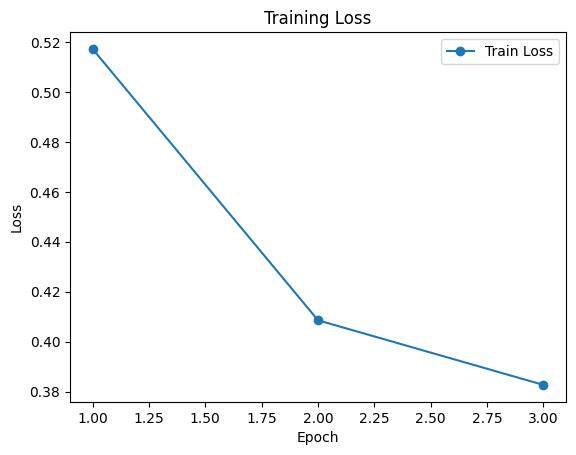

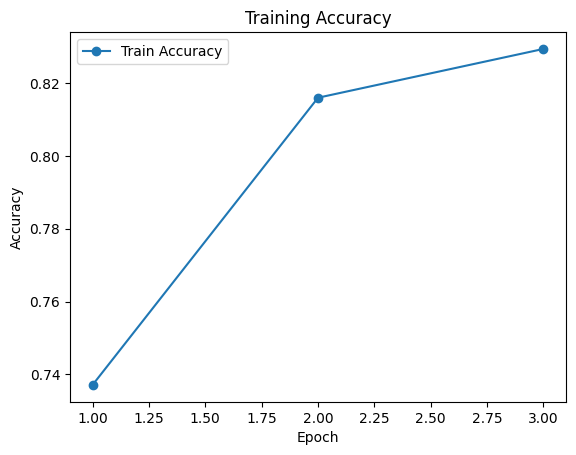

<Figure size 640x480 with 0 Axes>

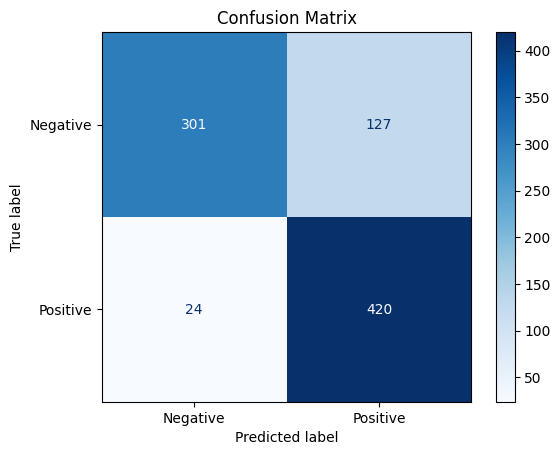

In [ ]:
val_predicted_labels, val_true_labels, test_accuracy = evaluate_model(att_model, validation_dataloader)
print(f"Test Accuracy: {test_accuracy:.4f}")
plot_training_metrics(train_loss_history, train_accuracy_history, num_epochs=3)
class_names = ["Negative", "Positive"]
plot_confusion_matrix(val_true_labels, val_predicted_labels, class_names)

## **7**

In [ ]:
import numpy as np
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

class UnidirectionalAttentionClassifier(nn.Module):
    def __init__(self, base_model, hidden_dim, num_attention_heads, num_classes, direction="left-to-right"):
        super(UnidirectionalAttentionClassifier, self).__init__()
        self.base_model = base_model
        self.unidirectional_attention = nn.MultiheadAttention(embed_dim=hidden_dim, num_heads=num_attention_heads, batch_first=True)
        self.output_layer = nn.Linear(hidden_dim, num_classes)
        self.direction = direction

        for param in self.base_model.parameters():
            param.requires_grad = False

    def forward(self, input_ids, attention_mask):
        outputs = self.base_model(input_ids=input_ids, attention_mask=attention_mask)
        hidden_states = outputs.last_hidden_state

        # Create attention mask based on the direction
        seq_length = hidden_states.size(1)
        if self.direction == "left-to-right":
            attn_mask = torch.zeros(seq_length, seq_length, device=hidden_states.device)
            attn_mask = torch.triu(attn_mask, diagonal=1).fill_(float('-1e9'))
        elif self.direction == "right-to-left":
            attn_mask = torch.zeros(seq_length, seq_length, device=hidden_states.device)
            attn_mask = torch.tril(attn_mask, diagonal=-1).fill_(float('-1e9'))
        else:
            raise ValueError("Invalid direction! Use 'left-to-right' or 'right-to-left'.")

        attention_output, _ = self.unidirectional_attention(hidden_states, hidden_states, hidden_states, attn_mask=attn_mask)

        cls_embedding = attention_output[:, 0, :]

        logits = self.output_layer(cls_embedding)
        return logits

In [ ]:

def train_and_evaluate_unidirectional_classifier(classifier, training_loader, validation_loader, direction, epochs=3, max_grad_norm=1.0):

  # Train
    optimizer = torch.optim.AdamW(classifier.parameters(), lr=5e-5)
    loss_function = nn.CrossEntropyLoss()

    print(f"\nTraining {direction} Unidirectional Attention Classifier\n")

    train_loss_history, train_accuracy_history = [], []
    for epoch in range(epochs):
        classifier.train()
        cumulative_loss, correct_predictions, total_samples = 0, 0, 0

        progress_bar = tqdm(training_loader, desc=f"Epoch {epoch + 1}/{epochs}")

        for batch_data in progress_bar:
            input_tensors = {key: val.to("cuda") for key, val in batch_data.items() if key in ["input_ids", "attention_mask"]}
            target_labels = batch_data["labels"].to("cuda")

            predictions = classifier(**input_tensors)
            batch_loss = loss_function(predictions, target_labels)

            optimizer.zero_grad()
            batch_loss.backward()

            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(classifier.parameters(), max_grad_norm)

            optimizer.step()

            cumulative_loss += batch_loss.item()
            predicted_labels = torch.argmax(predictions, dim=-1)
            correct_predictions += (predicted_labels == target_labels).sum().item()
            total_samples += target_labels.size(0)

            progress_bar.set_postfix(loss=batch_loss.item())

        avg_loss = cumulative_loss / len(training_loader)
        epoch_accuracy = correct_predictions / total_samples
        train_loss_history.append(avg_loss)
        train_accuracy_history.append(epoch_accuracy)
        print(f"Epoch {epoch + 1}: Loss = {avg_loss:.4f}, Accuracy = {epoch_accuracy:.4f}")

    # Evaluate
    classifier.eval()
    all_predicted_labels, all_true_labels = [], []
    with torch.no_grad():
        for batch_data in tqdm(validation_loader, desc=f"Evaluating {direction} Classifier"):
            input_tensors = {key: val.to("cuda") for key, val in batch_data.items() if key in ["input_ids", "attention_mask"]}
            target_labels = batch_data["labels"].to("cuda")
            predictions = classifier(**input_tensors)

            predicted_labels = torch.argmax(predictions, dim=-1)
            all_predicted_labels.extend(predicted_labels.cpu().numpy())
            all_true_labels.extend(target_labels.cpu().numpy())

    # validation accuracy
    validation_accuracy = np.mean(np.array(all_predicted_labels) == np.array(all_true_labels))
    print(f"\nValidation Accuracy for {direction} Classifier: {validation_accuracy:.4f}")

    # confusion Matrix
    class_names = ["Negative", "Positive"]
    plot_confusion_matrix(all_true_labels, all_predicted_labels, class_names)

    # Plot
    plot_training_metrics(train_loss_history, train_accuracy_history, num_epochs=3)

    return validation_accuracy




Training Left-to-Right Unidirectional Attention Classifier



Epoch 1/3: 100%|██████████| 4210/4210 [09:58<00:00,  7.04it/s, loss=0.818]


Epoch 1: Loss = 0.5473, Accuracy = 0.7196


Epoch 2/3: 100%|██████████| 4210/4210 [09:58<00:00,  7.03it/s, loss=0.57]


Epoch 2: Loss = 0.4284, Accuracy = 0.8076


Epoch 3/3: 100%|██████████| 4210/4210 [09:57<00:00,  7.04it/s, loss=0.133]


Epoch 3: Loss = 0.4018, Accuracy = 0.8221


Evaluating Left-to-Right Classifier: 100%|██████████| 55/55 [00:07<00:00,  7.66it/s]

Validation Accuracy for Left-to-Right Classifier: 0.7924


<Figure size 640x480 with 0 Axes>

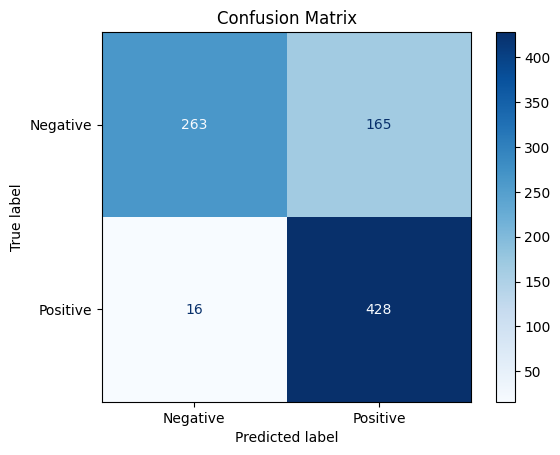

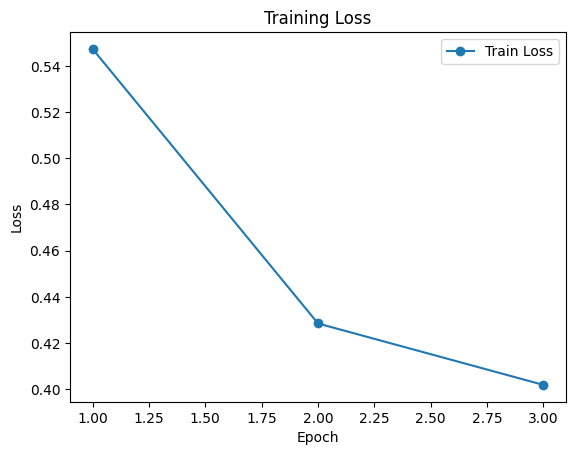

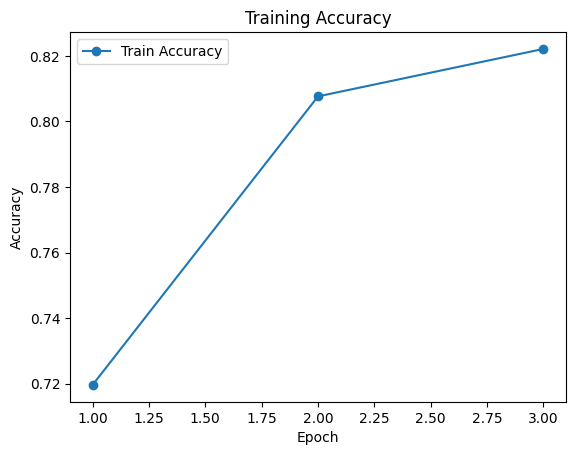

In [ ]:
# left-to-right classifier
ltr_classifier = UnidirectionalAttentionClassifier(
    base_model=base_model,
    hidden_dim=768,
    num_attention_heads=12,
    num_classes=2,
    direction="left-to-right"
).to("cuda")

ltr_validation_accuracy = train_and_evaluate_unidirectional_classifier(
    ltr_classifier,
    train_dataloader,
    validation_dataloader,
    direction="Left-to-Right",
    epochs=3
)




Training Right-to-Left Unidirectional Attention Classifier



Epoch 1/3: 100%|██████████| 4210/4210 [09:57<00:00,  7.05it/s, loss=0.0853]


Epoch 1: Loss = 0.5458, Accuracy = 0.7231


Epoch 2/3: 100%|██████████| 4210/4210 [09:57<00:00,  7.05it/s, loss=0.203]


Epoch 2: Loss = 0.4286, Accuracy = 0.8075


Epoch 3/3: 100%|██████████| 4210/4210 [09:57<00:00,  7.05it/s, loss=0.431]


Epoch 3: Loss = 0.4067, Accuracy = 0.8191


Evaluating Right-to-Left Classifier: 100%|██████████| 55/55 [00:07<00:00,  7.67it/s]

Validation Accuracy for Right-to-Left Classifier: 0.8670


<Figure size 640x480 with 0 Axes>

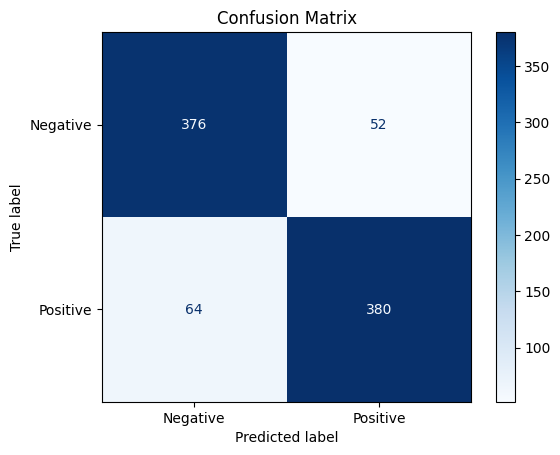

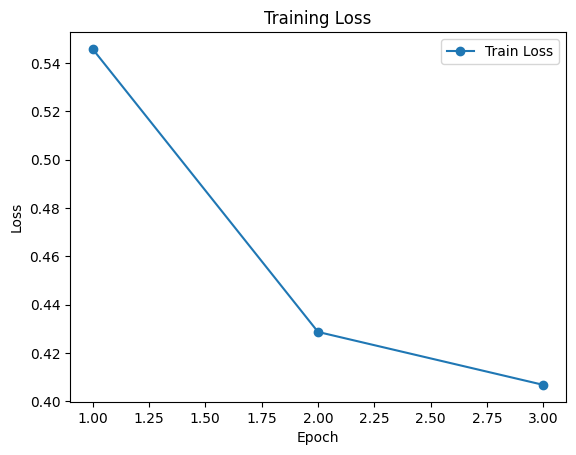

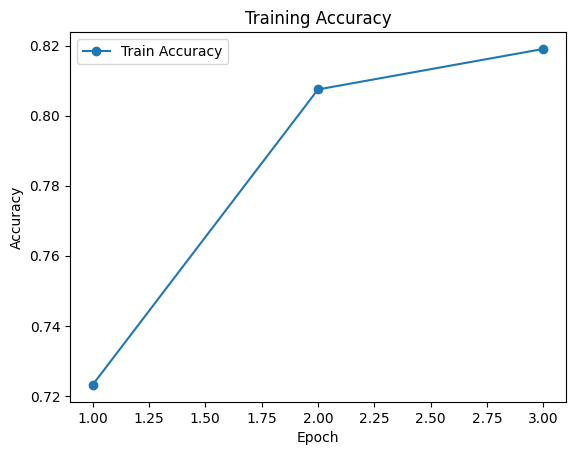

In [ ]:
# right-to-left classifier
rtl_classifier = UnidirectionalAttentionClassifier(
    base_model=base_model,
    hidden_dim=768,
    num_attention_heads=12,
    num_classes=2,
    direction="right-to-left"
).to("cuda")

rtl_validation_accuracy = train_and_evaluate_unidirectional_classifier(
    rtl_classifier,
    train_dataloader,
    validation_dataloader,
    direction="Right-to-Left",
    epochs=3
)


## **8**

In [2]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/35.3k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/3.11M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/72.8k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/148k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Zero-Shot Accuracy: 0.8819
Classification Report:
               precision    recall  f1-score   support

    negative       0.83      0.96      0.89       428
    positive       0.95      0.81      0.87       444

    accuracy                           0.88       872
   macro avg       0.89      0.88      0.88       872
weighted avg       0.89      0.88      0.88       872



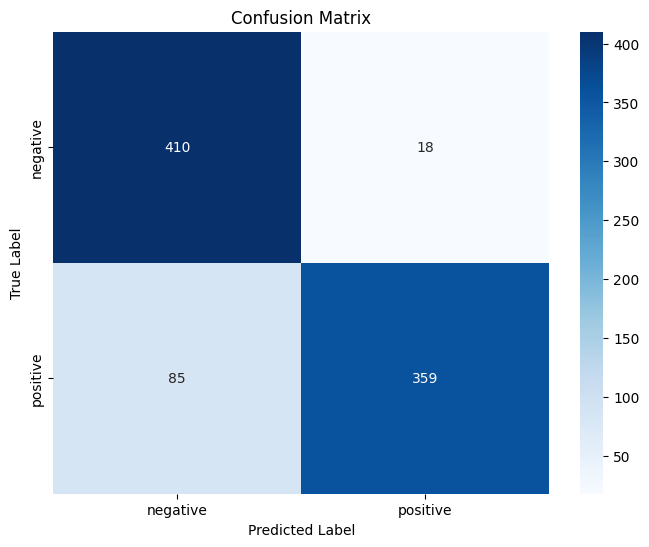

In [3]:
# from datasets import load_dataset
# from transformers import pipeline
# from sklearn.metrics import accuracy_score, classification_report

# sst2_dataset = load_dataset("glue", "sst2")
# validation_set = sst2_dataset["validation"]

# zero_shot_classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# candidate_classes = ["negative", "positive"]

# predicted_classes, true_classes = [], []

# for data_point in validation_set:
#     sentence_text = data_point["sentence"]
#     actual_label = data_point["label"]

#     classification_result = zero_shot_classifier(sentence_text, candidate_labels=candidate_classes)

#     # Extract the predicted label
#     predicted_label = classification_result["labels"][0]
#     predicted_classes.append(0 if predicted_label == "negative" else 1)
#     true_classes.append(actual_label)

# zero_shot_accuracy = accuracy_score(true_classes, predicted_classes)
# classification_metrics = classification_report(
#     true_classes, predicted_classes, target_names=["negative", "positive"], zero_division=1
# )

# print(f"Zero-Shot Accuracy: {zero_shot_accuracy:.4f}")
# print("Classification Report:\n", classification_metrics)



from datasets import load_dataset
from transformers import pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the SST-2 validation set
sst2_dataset = load_dataset("glue", "sst2")
validation_set = sst2_dataset["validation"]

# Initialize the zero-shot classification pipeline
zero_shot_classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Define candidate classes
candidate_classes = ["negative", "positive"]

# Lists to store predicted and true classes
predicted_classes, true_classes = [], []

# Perform classification
for data_point in validation_set:
    sentence_text = data_point["sentence"]
    actual_label = data_point["label"]

    classification_result = zero_shot_classifier(sentence_text, candidate_labels=candidate_classes)

    # Extract the predicted label
    predicted_label = classification_result["labels"][0]
    predicted_classes.append(0 if predicted_label == "negative" else 1)
    true_classes.append(actual_label)

# Evaluate accuracy and classification metrics
zero_shot_accuracy = accuracy_score(true_classes, predicted_classes)
classification_metrics = classification_report(
    true_classes, predicted_classes, target_names=["negative", "positive"], zero_division=1
)

# Print results
print(f"Zero-Shot Accuracy: {zero_shot_accuracy:.4f}")
print("Classification Report:\n", classification_metrics)

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["negative", "positive"], yticklabels=["negative", "positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Overall Analysis of Results

#### **1. Performance Trends**
- **Zero-shot classification** (Part 8) outperformed all other methods in generalization, showing the strength of pre-trained large language models like `facebook/bart-large-mnli` in leveraging large-scale training for tasks they weren’t explicitly fine-tuned on.
- Among the fine-tuned models, **Right-to-Left Unidirectional Attention** (Part 7) achieved the best validation performance, likely due to its ability to effectively capture contextual information in its directional setup.

#### **2. Impact of Architectural Changes**
- The **Bidirectional Attention Model** (Part 6) demonstrated significant improvements over earlier setups (Parts 4 and 5) by leveraging attention mechanisms to model relationships between tokens bidirectionally.
- **Left-to-Right Unidirectional Attention** (Part 7) performed well but exhibited slightly more class imbalance compared to the Right-to-Left setup, reflecting the inherent limitations of unidirectional context processing.

#### **3. Class Balance**
- The **confusion matrices** showed varying degrees of bias:
  - The simpler models (Parts 4 and 5) struggled with class imbalance, favoring the positive class.
  - Advanced architectures (Parts 6 and 7) showed better balance, with Right-to-Left outperforming Left-to-Right in this regard.
  - The zero-shot model balanced precision and recall effectively, though it leaned slightly toward the negative class.

#### **4. Computational Efficiency**
- The **zero-shot model** offered strong performance with no training, saving computational resources.
- Fine-tuning (Parts 4-7) required additional computational effort but allowed exploration of task-specific architectures.

---

### Key Takeaways
- **Zero-shot performance** serves as an excellent baseline and highlights the power of pre-trained models.
- **Attention mechanisms** (bidirectional and unidirectional) significantly improve contextual understanding compared to simpler setups, with **Right-to-Left Attention** showing the best balance and generalization.
- Fine-tuning smaller architectures (Parts 4 and 5) struggles with class balance, but attention-based architectures (Parts 6 and 7) address this limitation effectively.

---

---------
### References

[1] Raffel, Colin, Noam Shazeer, Adam Roberts, et al. (2020). *Exploring the Limits of Transfer Learning with a Unified Text-to-Text Transformer*. [Link to paper](https://arxiv.org/abs/1910.10683)

[2] Touvron, Hugo, et al. (2023). *LLaMA 2: Open Foundation and Fine-Tuned Chat Models*. [Link to paper](https://arxiv.org/abs/2307.09288)

<span style="color:yellow;">*For further reading on this field of research, you can refer to the following papers:*</span>

[3] BehnamGhader, Adlakha, et al. (2024). *LLM2Vec: Large Language Models Are Secretly Powerful Text Encoders*. [Link to paper](https://arxiv.org/abs/2404.05961)

[4] Gao, Tianyu, et al. (2021). *SimCSE: Simple Contrastive Learning of Sentence Embeddings*. [Link to paper](https://arxiv.org/abs/2104.08821)

[5] Lee, et al. (2023). *NV-Embed: Improved Techniques for Training LLMs as Generalist Embedding Models*. [Link to paper](https://arxiv.org/abs/2405.17428)




# **Best regards.**